In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense
from keras.optimizers import Adam
print('o')
# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)


# 建立簡單的線性執行的模型
model = Sequential()
# 加 RNN 隱藏層(hidden layer)
model.add(LSTM(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units= 50,
    unroll=True,
)) 
# 加 output 層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
LR = 0.001          # Learning Rate
adam = Adam(LR)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print('compile')
# 一批訓練多少張圖片
BATCH_SIZE = 50     
BATCH_INDEX = 0     
# 訓練模型 4001 次
for step in range(1, 4001):
    print('step : ',step)

    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    # 逐批訓練
    loss = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    # 每 500 批，顯示測試的準確率
    if step % 500 == 0:
        # 模型評估
        loss, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], 
            verbose=False)
        print("test loss: {}  test accuracy: {}".format(loss,accuracy))
        

# 預測(prediction)
X = X_test[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)



    
# 模型訓練結果存檔
model.save("SimpleLSTM.h5")

/Users/xinyu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xinyu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/xinyu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xinyu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


o
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
compile
step :  1
step :  2
step :  3
step :  4
step :  5
step :  6
step :  7
step :  8
step :  9
step :  10
step :  11
step :  12
step :  13
step :  14
step :  15
step :  16
step :  17
step :  18
step :  19
step :  20
step :  21
step :  22
step :  23
step :  24
step :  25
step :  26
step :  27
step :  28
step :  29
step :  30
step :  31
step :  32
step :  33
step :  34
step :  35
step :  36
step :  37
step :  38
step :  39
step :  40
step :  41
step :  42
step :  43
step :  44
step :  45
step :  46
step :  47
step :  48
step :  49
step :  50
step :  51
step :  52
step :  53
step :  54
step :  55
step :  56
step :  57
step :  58
step :  59
step :  60
step :  61
step :  62
step :  63
step :  64
step :  65
step :  66
step :  67
step :  68
step :  69
step :  70
step :  71
step :  72
step :  73
step :  74
step :  75
step :  76
step :  77
step :

step :  635
step :  636
step :  637
step :  638
step :  639
step :  640
step :  641
step :  642
step :  643
step :  644
step :  645
step :  646
step :  647
step :  648
step :  649
step :  650
step :  651
step :  652
step :  653
step :  654
step :  655
step :  656
step :  657
step :  658
step :  659
step :  660
step :  661
step :  662
step :  663
step :  664
step :  665
step :  666
step :  667
step :  668
step :  669
step :  670
step :  671
step :  672
step :  673
step :  674
step :  675
step :  676
step :  677
step :  678
step :  679
step :  680
step :  681
step :  682
step :  683
step :  684
step :  685
step :  686
step :  687
step :  688
step :  689
step :  690
step :  691
step :  692
step :  693
step :  694
step :  695
step :  696
step :  697
step :  698
step :  699
step :  700
step :  701
step :  702
step :  703
step :  704
step :  705
step :  706
step :  707
step :  708
step :  709
step :  710
step :  711
step :  712
step :  713
step :  714
step :  715
step :  716
step :  717
step

step :  1293
step :  1294
step :  1295
step :  1296
step :  1297
step :  1298
step :  1299
step :  1300
step :  1301
step :  1302
step :  1303
step :  1304
step :  1305
step :  1306
step :  1307
step :  1308
step :  1309
step :  1310
step :  1311
step :  1312
step :  1313
step :  1314
step :  1315
step :  1316
step :  1317
step :  1318
step :  1319
step :  1320
step :  1321
step :  1322
step :  1323
step :  1324
step :  1325
step :  1326
step :  1327
step :  1328
step :  1329
step :  1330
step :  1331
step :  1332
step :  1333
step :  1334
step :  1335
step :  1336
step :  1337
step :  1338
step :  1339
step :  1340
step :  1341
step :  1342
step :  1343
step :  1344
step :  1345
step :  1346
step :  1347
step :  1348
step :  1349
step :  1350
step :  1351
step :  1352
step :  1353
step :  1354
step :  1355
step :  1356
step :  1357
step :  1358
step :  1359
step :  1360
step :  1361
step :  1362
step :  1363
step :  1364
step :  1365
step :  1366
step :  1367
step :  1368
step :  1369

step :  1922
step :  1923
step :  1924
step :  1925
step :  1926
step :  1927
step :  1928
step :  1929
step :  1930
step :  1931
step :  1932
step :  1933
step :  1934
step :  1935
step :  1936
step :  1937
step :  1938
step :  1939
step :  1940
step :  1941
step :  1942
step :  1943
step :  1944
step :  1945
step :  1946
step :  1947
step :  1948
step :  1949
step :  1950
step :  1951
step :  1952
step :  1953
step :  1954
step :  1955
step :  1956
step :  1957
step :  1958
step :  1959
step :  1960
step :  1961
step :  1962
step :  1963
step :  1964
step :  1965
step :  1966
step :  1967
step :  1968
step :  1969
step :  1970
step :  1971
step :  1972
step :  1973
step :  1974
step :  1975
step :  1976
step :  1977
step :  1978
step :  1979
step :  1980
step :  1981
step :  1982
step :  1983
step :  1984
step :  1985
step :  1986
step :  1987
step :  1988
step :  1989
step :  1990
step :  1991
step :  1992
step :  1993
step :  1994
step :  1995
step :  1996
step :  1997
step :  1998

step :  2545
step :  2546
step :  2547
step :  2548
step :  2549
step :  2550
step :  2551
step :  2552
step :  2553
step :  2554
step :  2555
step :  2556
step :  2557
step :  2558
step :  2559
step :  2560
step :  2561
step :  2562
step :  2563
step :  2564
step :  2565
step :  2566
step :  2567
step :  2568
step :  2569
step :  2570
step :  2571
step :  2572
step :  2573
step :  2574
step :  2575
step :  2576
step :  2577
step :  2578
step :  2579
step :  2580
step :  2581
step :  2582
step :  2583
step :  2584
step :  2585
step :  2586
step :  2587
step :  2588
step :  2589
step :  2590
step :  2591
step :  2592
step :  2593
step :  2594
step :  2595
step :  2596
step :  2597
step :  2598
step :  2599
step :  2600
step :  2601
step :  2602
step :  2603
step :  2604
step :  2605
step :  2606
step :  2607
step :  2608
step :  2609
step :  2610
step :  2611
step :  2612
step :  2613
step :  2614
step :  2615
step :  2616
step :  2617
step :  2618
step :  2619
step :  2620
step :  2621

step :  3174
step :  3175
step :  3176
step :  3177
step :  3178
step :  3179
step :  3180
step :  3181
step :  3182
step :  3183
step :  3184
step :  3185
step :  3186
step :  3187
step :  3188
step :  3189
step :  3190
step :  3191
step :  3192
step :  3193
step :  3194
step :  3195
step :  3196
step :  3197
step :  3198
step :  3199
step :  3200
step :  3201
step :  3202
step :  3203
step :  3204
step :  3205
step :  3206
step :  3207
step :  3208
step :  3209
step :  3210
step :  3211
step :  3212
step :  3213
step :  3214
step :  3215
step :  3216
step :  3217
step :  3218
step :  3219
step :  3220
step :  3221
step :  3222
step :  3223
step :  3224
step :  3225
step :  3226
step :  3227
step :  3228
step :  3229
step :  3230
step :  3231
step :  3232
step :  3233
step :  3234
step :  3235
step :  3236
step :  3237
step :  3238
step :  3239
step :  3240
step :  3241
step :  3242
step :  3243
step :  3244
step :  3245
step :  3246
step :  3247
step :  3248
step :  3249
step :  3250

step :  3802
step :  3803
step :  3804
step :  3805
step :  3806
step :  3807
step :  3808
step :  3809
step :  3810
step :  3811
step :  3812
step :  3813
step :  3814
step :  3815
step :  3816
step :  3817
step :  3818
step :  3819
step :  3820
step :  3821
step :  3822
step :  3823
step :  3824
step :  3825
step :  3826
step :  3827
step :  3828
step :  3829
step :  3830
step :  3831
step :  3832
step :  3833
step :  3834
step :  3835
step :  3836
step :  3837
step :  3838
step :  3839
step :  3840
step :  3841
step :  3842
step :  3843
step :  3844
step :  3845
step :  3846
step :  3847
step :  3848
step :  3849
step :  3850
step :  3851
step :  3852
step :  3853
step :  3854
step :  3855
step :  3856
step :  3857
step :  3858
step :  3859
step :  3860
step :  3861
step :  3862
step :  3863
step :  3864
step :  3865
step :  3866
step :  3867
step :  3868
step :  3869
step :  3870
step :  3871
step :  3872
step :  3873
step :  3874
step :  3875
step :  3876
step :  3877
step :  3878

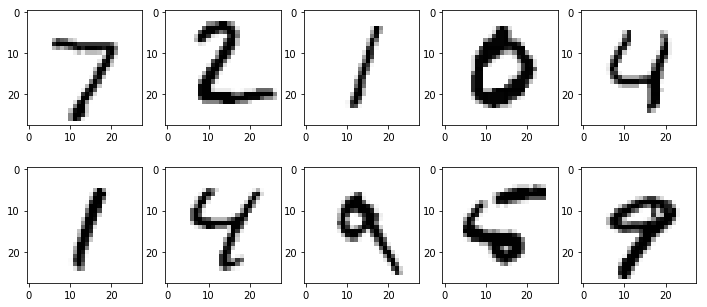

In [24]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    for i in range(0, 10):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(image[i], cmap='binary')  
        
    plt.show()
    
plot_image(X_test)

In [13]:

print(y_test[:10,:])
print(X_test[0,:])


ModuleNotFoundError: No module named 'seaborn'